In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('dc_crime_add_vars.csv')

In [2]:
#Determine the time covered by the data

print(df['date'].min())
print(df['date'].max())

2008-01-01 00:58:00
2017-11-03 00:26:42


<B>This data set provides almost 10 years of crime data in Washington D.C.  DC is divided into 8 Wards and the following analyses uses Wards to segment the data</B>

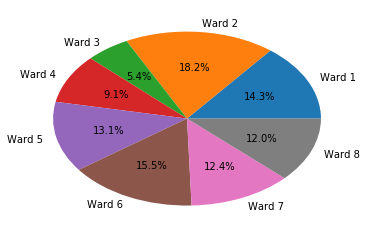

In [3]:
##This will generate a pie graph showing the percentage of crime incidents by Ward

total_rows = df.index.max() + 1
label = []

df2 = df.groupby(['WARD']).aggregate(np.count_nonzero)
df2['percent'] = df2['DISTRICT']/total_rows

for item in (df2.index):
    label.append('Ward {}'.format(item))
    
plt.pie(df2['percent'], labels=label, autopct='%1.1f%%')
plt.show()

<B>Ward 2 accounted for 18.2% of the crime reported over this ~10 year period.  That is over 3 times as Ward 3 which accounted for 5.4% of the crime incidents reported</B>

(array([27945., 14686., 10952., 36905., 35484., 38984., 58232., 39033.,
        36499., 44147.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

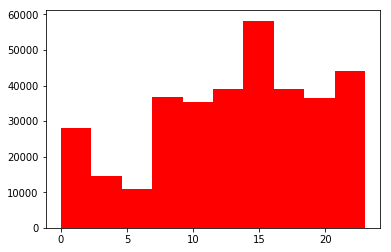

In [4]:
##This historgram graphs the frequency of what hour of the day crimes occur in DC
plt.hist(df['hour'], color='red')



<B>Across the ~10 years of crime data, most crimes take place in the 3 PM hour.  Crime frequency from 7 AM to midnight, looks pretty consistent, with a spike in the 10 and 11 PM hours</B>

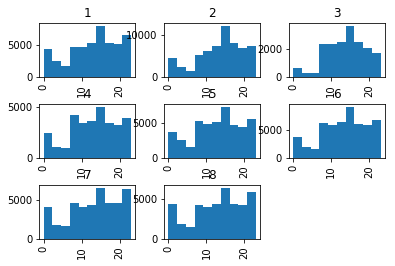

In [5]:
##Is the pattern for when crime occurs consistent across wards?

df['hour'].hist(by=df['WARD'])
plt.show()


<B>The spike in the 3 pm hour is consistent across wards.  All patterns are consistent except for Ward 3.  Where all other wards, show a spike in crime in the 10 PM and 11 PM hours, Ward 3 actually sees a decrease.</B>  

TypeError: scatter() missing 1 required positional argument: 'y'

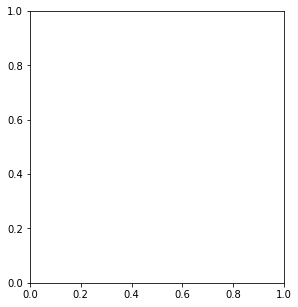

In [6]:
##Couldn't figure out how to create sub-plots to do what I did above, to have those graphs show up larger

##df.loc[lambda df: df['WARD'] == 1, ['hour']]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(df.loc[lambda df: df['WARD'] == 1, ['hour']], color='purple')
plt.ylabel('Values')
plt.title('Random Series')

plt.subplot(1, 2, 2)
plt.scatter(df.loc[lambda df: df['WARD'] == 2, ['hour']], color='green')
plt.ylabel('Values')
plt.title('Random Series')

plt.tight_layout()
plt.show()

In [ ]:
##Wanted to drill into the types of offense by Ward so created a bar graph based on a pivot table
##used PSA, but could have used any other value since I am interested in the count

    
offense_by_ward = df.pivot_table(index='WARD', columns='OFFENSE', values='PSA', aggfunc='count')

offense_by_ward.plot(kind='bar', figsize=[16,6], stacked=True, colormap='Paired') # area plot


<B>Theft/Other is the most prevalent offense across Wards, followed by Theft F/Auto.  As seen in previous analyses, Ward 3 is the "safest" Ward, with relatively less crime overall and relatively negligible violent cirmes (e.g. Assalut W/Dangerous Weapon).  I was surprised, concerned that the ammount of Sex Abuse reported in some wards was enough to register on this chart.</B>